# Logistic Regression
---

The examples in this notebook illustrate the process of learning a logistic regression model with both linear and non-linear features so as to show how the latter enables more complex decision boundaries to be formed.

---

In [1]:
#Some libraries that we will be using.
from __future__ import print_function, division
import numpy as np
from scipy.io import loadmat
from IPython import display

#Configure the matplotlib backend as plotting inline
%matplotlib inline
import matplotlib.pyplot as plt

#Enables latex
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica'],'size':'20'})
## for Palatino and other serif fonts use:
#rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)

First let us load and visualize the dataset:

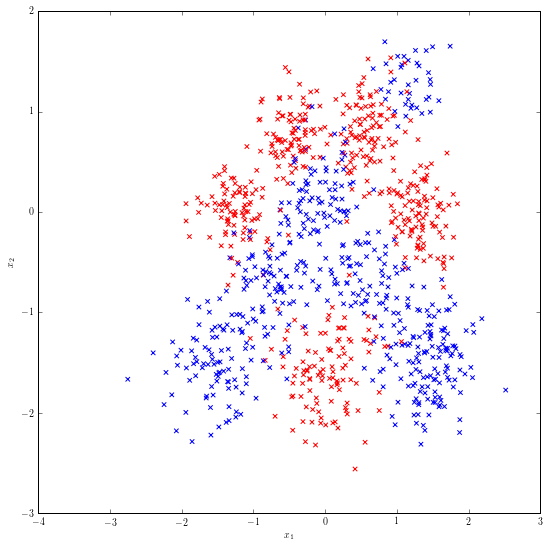

In [15]:
dataset = loadmat('intro_module_ml_data.mat')

X = dataset['X']        # The 2-D data
labels = dataset['y']   # The labels
N = labels.shape[0]     # Number of data-points

colors = np.array([[0.0,0.0,1.0],[1.0,0.0,0.0]])      #Colors for two classes

fig, ax = plt.subplots()
fig.set_size_inches(9,9)
ax.scatter(X[:,0],X[:,1],c=colors[labels.reshape(N,)],marker='x')
ax.set_xlabel(r'$x_{1}$')
ax.set_ylabel(r'$x_{2}$')

Split data into training and test datasets so as to evaluate how well the different logistic regression models perform. We use a 70/30 (training/test) data split.

In [4]:
N_train = 700
N_test = N - N_train

train_data = X[:N_train,:]
train_labels = labels[:N_train,:]
test_data = X[N_train:,:]
test_labels = labels[N_train:,:]

We now define functions we will use in both sections.

In [5]:
def sigmoid(z):
    """
        Evaluates the sigmoid function s(z) = 1/(1+exp(-z))
    """
    
    return 1/(1+np.exp(-z))

def logLikelihood(X,y,beta):
    """
        Return log-likelihood of parameters beta given data X and labels y
    """
    
    return np.dot(y.T,np.log(sigmoid(np.dot(X,beta)))) + np.dot((1-y).T,np.log(sigmoid(np.dot(-X,beta))))

## 1. 2-D Linear Logistic Regression

For a dataset $\mathcal{D} = \{(\mathbf{x}^{(1)},y^{(1)}),...,(\mathbf{x}^{(N)},y^{(N)})\}$ where we assume $y^{(n)} \in \{0,1\}$, $\mathbf{x}^{(n)} \in \Re^{2}$ and we define $\tilde{\mathbf{x}}^{(n)} = \begin{pmatrix} 1 \\ \mathbf{x}^{(n)} \end{pmatrix}$:

$$
\newcommand\given[1][]{\:#1\vert\:}
P(y^{(n)}=1 \given{\tilde{\mathbf{x}}^{(n)}, \beta}) = \sigma(\beta^{T}\tilde{\mathbf{x}}^{(n)}) \\
P(y^{(n)}=0 \given{\tilde{\mathbf{x}}^{(n)}, \beta}) = 1 - \sigma(\beta^{T}\tilde{\mathbf{x}}^{(n)}) = \sigma(-\beta^{T}\tilde{\mathbf{x}}^{(n)})
$$

where $\sigma(z) = \frac{1}{1+\exp(-z)}$ is known as the \textbf{sigmoid} function and $\beta$ are the parameters of the model.

We can then define the log-likelihood of $\beta$ as:
$$
\mathcal{L}(\beta) = \ln P(y \given{\mathbf{X}, \beta}) = \sum_{n} \ln P(y^{(n)}\given{\tilde{\mathbf{x}}^{(n)}, \beta}) \\
= \sum_{n} \left[ y^{(n)} \ln \sigma(\beta^{T}\tilde{\mathbf{x}}^{(n)}) + (1 - y^{(n)}) \ln \sigma(-\beta^{T}\tilde{\mathbf{x}}^{(n)})\right] 
$$

This likelihood can then be maximised by learning $\beta$ through gradient ascent and so we get the gradient with respect to the parameters as:

$$
\frac{\partial \mathcal{L}(\beta)}{\partial \beta} = \sum_{n} (y^{(n)} - \sigma(\beta^{T}\tilde{\mathbf{x}}^{(n)}))\tilde{\mathbf{x}}^{(n)}
$$

The learning rule is then:

$$
\beta^{[t+1]} = \beta^{[t]} + \eta\sum_{n} (y^{(n)} - \sigma(\beta^{T}\tilde{\mathbf{x}}^{(n)}))\tilde{\mathbf{x}}^{(n)}
$$

where $\eta$ is known as the \textbf{learning rate}.

Once a convergence condition is satisfied (e.g. the change in $\beta$ is very small), learning is stopped and the accuracy of the parameters on the test dataset is evaluated.

Test accuracy:  [ 62.]


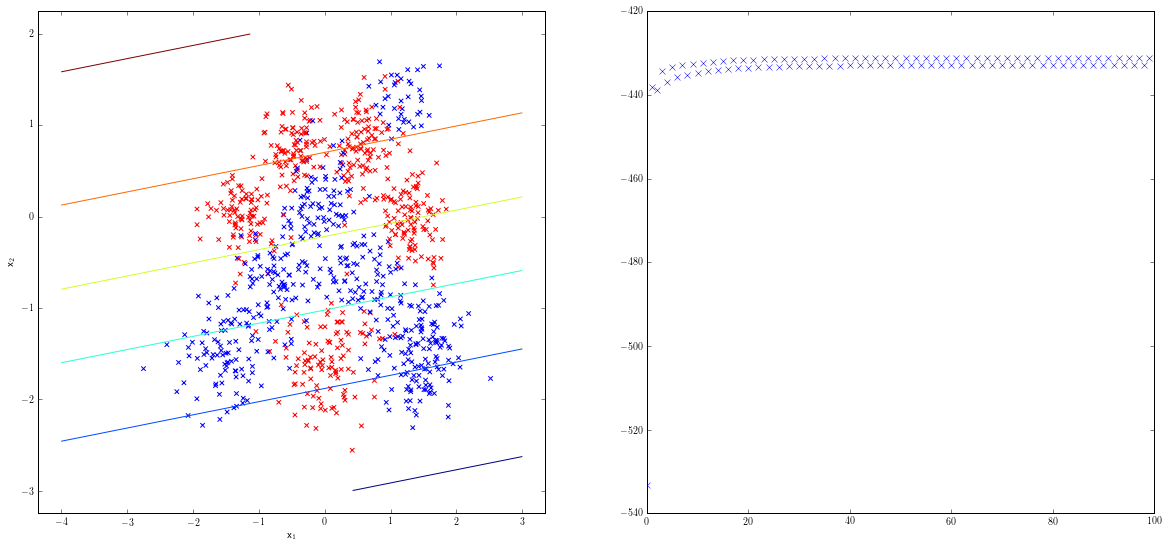

In [7]:
#Create datasets with bias features added 
X_train = np.append(np.ones((N_train,1)),train_data,axis=1)
X_test = np.append(np.ones((N_test,1)),test_data,axis=1)
y_train = train_labels
y_test = test_labels

#Set up figure
fig, (ax1, ax2) = plt.subplots(1,2)
fig.set_size_inches(20,9)
ax1.scatter(X[:,0],X[:,1],c=colors[labels.reshape(N,)],marker='x')
ax1.set_xlabel(r'x_{1}')
ax1.set_ylabel(r'x_{2}')
ax2.set_xlabel('Num iterations')
ax2.set_ylabel(r'$\mathcal{L}(\beta)$')

x1 = np.linspace(-4,3,100)
x2 = np.linspace(-3,2,100)
X1, X2 = np.meshgrid(x1,x2)

D = X_train.shape[1]             #Dimension of expanded datapoints
maxit = 100                      #Maximum number of iterations for gradient ascent
eta = 0.01                       #Learning rate         

runTillEnd = False               
num_iters = 0  

#Perform one iteration
beta_init = np.random.randn(D)
beta = beta_init

while num_iters < maxit:
    beta_prev = beta
    grad = np.dot(X_train.T,(y_train-sigmoid(np.dot(X_train,beta_prev).reshape(-1,1))))
    beta = beta_prev.reshape(-1,1) + eta*grad.reshape(-1,1)
   
    #Update log-likelihood array
    LL_train = logLikelihood(X_train,y_train,beta)
    LL_test = logLikelihood(X_test,y_test,beta)
    logLike = np.append(logLike,LL_train)    

    #Plot probability contour, beta vector (bias omitted) and log-likelihood plot
    display.clear_output(wait=True)
    if num_iters > 0:
        num_levels = len(c.levels)
        del ax1.collections[-num_levels:]

    c = ax1.contour(X1, X2, sigmoid(beta[0] + beta[1]*X1 + beta[2]*X2))
    
    ax2.plot(num_iters,LL_train,'bx',label=r'Train')
    ax2.plot(num_iters,LL_test,'rx',label=r'Test')
    
    display.display(plt.gcf())
    if num_iters == 0:
        ax2.legend()
    
    if not runTillEnd:
        if input("Press enter to continue. Type 'rte' to run simulation to end") == 'rte':
            runTillEnd = True
    
    num_iters += 1

display.clear_output(wait=True)
tau = 0.5      #Threshold for classification
predicted_labels = sigmoid(np.dot(X_test,beta)) > tau
print("Test accuracy: %1.1f%%" % (100.0*sum(predicted_labels==y_test)/N_test))

## 1. 2-D Non-Linear Logistic Regression

The non-linear case is exactly the same as the linear case other than the fact that the inputs are mapped to a higher dimensional space by computing a non-linear function of these inputs i.e. $\mathbf{x}$ is replaced with $\phi(\mathbf{x})$ where $\phi(.)$ is some non-linear function.

For this example, we use \textbf{radial basis functions} where the $(m+1)$th feature in the feature-expanded input, $\tilde{\mathbf{x}}^{(n)}$, is given as:

$$
\tilde{x}_{m+1}^{(n)} = \exp\left(-\frac{1}{2l^{2}}\sum_{d=1}^{2}(x_{d}^{(n)} - x_{m}^{(n)})^{2}\right) 
$$

where $l$ is a free parameter, $\tilde{x}_{1}^{(n)} = 1$ and $m = 0,...,N_{train}$. In other words, we use $N_{train}$ RBFs centered on each training data point.

The training procedure is then identical to the linear case as above.

Test accuracy: 91.0%


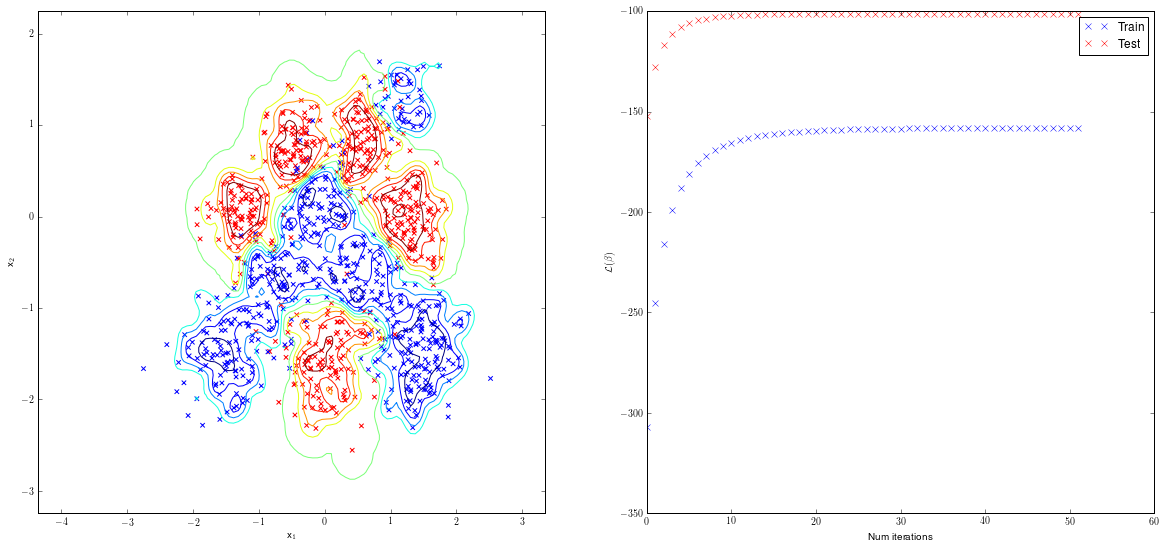

In [14]:
X_train = np.append(np.ones((N_train,1)),np.zeros((N_train,N_train)),axis=1)
X_test = np.append(np.ones((N_test,1)),np.zeros((N_test,N_train)),axis=1)
y_train = train_labels
y_test = test_labels

#Create new RBF features
for i in range(N_train):
    X_train[:,i+1] = np.sum((train_data - train_data[i,:])**2,axis=1)
    X_test[:,i+1] = np.sum((test_data - train_data[i,:])**2,axis=1)

l = 0.1     #RBF width
X_train = np.exp(-0.5*(l**-2)*X_train)
X_test = np.exp(-0.5*(l**-2)*X_test)

#Create the features for the 2-D grid of points
x1 = np.linspace(-4,3,100)
x2 = np.linspace(-3,2,100)
X1, X2 = np.meshgrid(x1,x2)

prob_datapt = np.zeros((len(x2),len(x1),N_train+1))  #Likelihood for each point on grid
prob_datapt[:,:,0] = np.ones((len(x2),len(x1)))     #Set bias features

for i in range(len(x2)):
    for j in range(len(x1)):
        prob_datapt[i,j,1:] = np.exp(-0.5*(l**-2)*np.sum((np.array([x1[j],x2[i]])-train_data)**2,axis=1))

        
#Set up figure
fig, (ax1, ax2) = plt.subplots(1,2)
fig.set_size_inches(20,9)
ax1.scatter(X[:,0],X[:,1],c=colors[labels.reshape(N,)],marker='x')
ax1.set_xlabel(r'x_{1}')
ax1.set_ylabel(r'x_{2}')
ax2.set_xlabel('Num iterations')
ax2.set_ylabel(r'$\mathcal{L}(\beta)$')


D = X_train.shape[1]      #Dimension of expanded datapoints
maxit = 100               #Maximum number of iterations for gradient ascent
eta = 0.1                 #Learning rate

num_iters = 0
runTillEnd = False

#Perform one iteration
beta_prev = np.zeros(D)
beta_init = np.random.randn(D)
beta = beta_init

while num_iters < maxit:
    
    #Update params
    beta_prev = beta
    grad = np.dot(X_train.T,(y_train-sigmoid(np.dot(X_train,beta_prev).reshape(-1,1))))
    beta = beta_prev.reshape(-1,1) + eta*grad
   
    #Save log-likelihoods
    LL_train = logLikelihood(X_train,y_train,beta)
    LL_test = logLikelihood(X_test,y_test,beta)

    #Plot data
    display.clear_output(wait=True)
    if num_iters > 0:
        num_levels = len(c.levels)
        del ax1.collections[-num_levels:]
    c = ax1.contour(X1, X2, sigmoid(np.dot(prob_datapt,beta).reshape(len(x1),-1,)),10)
    
    ax2.plot(num_iters,LL_train,'bx',label=r'Train')
    ax2.plot(num_iters,LL_test,'rx',label=r'Test')
    
    if num_iters == 0:
        ax2.legend()
    display.display(plt.gcf())
    
    if not runTillEnd:
        if input("Press enter to continue. Type 'rte' to run simulation to end. ") == 'rte':
            runTillEnd = True
    
    num_iters += 1

display.clear_output(wait=True)
predicted_labels = sigmoid(np.dot(X_test,beta)) > 0.5
print("Test accuracy: %1.1f%%" % (100.0*sum(predicted_labels==y_test)/N_test))

---
### Questions

- Now try different RBF widths and observe the training and test log-likelihoods and the probability contours formed.

- Also, try adding \textit{regularization} by introducing a Gaussian prior of the form, $p(\beta_{m}) = \frac{1}{Z}\exp\left(-\frac{1}{2}\beta_{m}^{2}\right)$ for $m = 0,...,N_{train}$, modifying the code to find the MAP (\textit{Maximum A Posteriori}) estimate of the parameters.